motive: We are attempting to use a constant-scaling method to perform endpoint estimations for beta and (possibly) gamma distributions. 
Basic steps are as follows:
1. Simulate a bunch of points and take some upper proportion p (upper thirds, upper quartile, etc.)
2. Calculate the standard deviation of the sample
3. Figure out what constant $c * \hat{\sigma}$ added to the sample maximum would get close to 1
4. Repeat 1-3 and obtain average of $c$ s.
5. Test on different Beta distributions (and maybe Gamma distributions). Is there a general rule?

In [15]:
#Import libraries here
#numpy help me
import numpy as np 
import matplotlib as plt
import seaborn as sns
seed = 2024

In [16]:
#Start with Beta(2,5) distribution
rng = np.random.default_rng(seed=seed)
sample = rng.beta(2,5,1000) #sample 1000 points from distribution
cutoff = np.percentile(sample, 66.7) #find cutoff for top third
test_sample = sample[sample > cutoff] #get top third
sd = np.std(test_sample) #get standard deviation
c = (1-np.max(test_sample)) / sd #get constant
print(c)

1.4094303685479377


<AxesSubplot: ylabel='Count'>

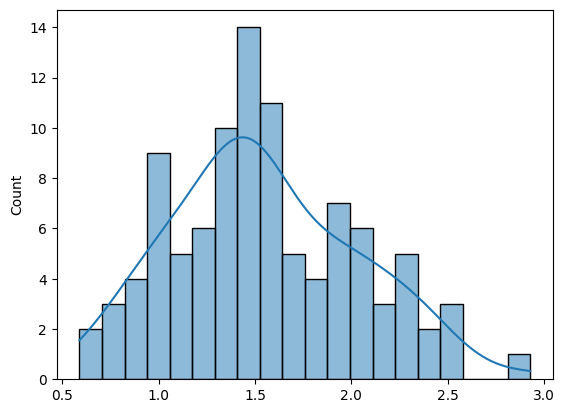

In [20]:
#repeat with different samples of Beta(2.5) distribution
seeds = np.linspace(2020, 2120, 100).astype(int)
const_array = []
for seed in seeds:
    rng = np.random.default_rng(seed=seed)
    sample = rng.beta(2,5,1000)
    cutoff = np.percentile(sample, 66.7)
    test_sample = sample[sample > cutoff]
    sd = np.std(test_sample)
    const_array.append((1-np.max(test_sample)) / sd)

#plot distribution of constant cs
sns.histplot(x = const_array, kde = True, bins=20)